In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pickle

In [12]:
df = pd.read_csv('../data/energy_efficiency_dataset.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [13]:
df.rename(columns={'X1':'Relative_Compactness','X2':'Surface_Area',
                   'X3':'Wall_Area','X4':'Roof_Area','X5':'Overall_Height',
                   'X6':'Orientation','X7':'Glazing_Area',
                   'X8':'Glazing_Area_Distribution','Y1':'Heating_Load',
                   'Y2':'Cooling_Load'}, inplace=True)
df.head()  

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [14]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

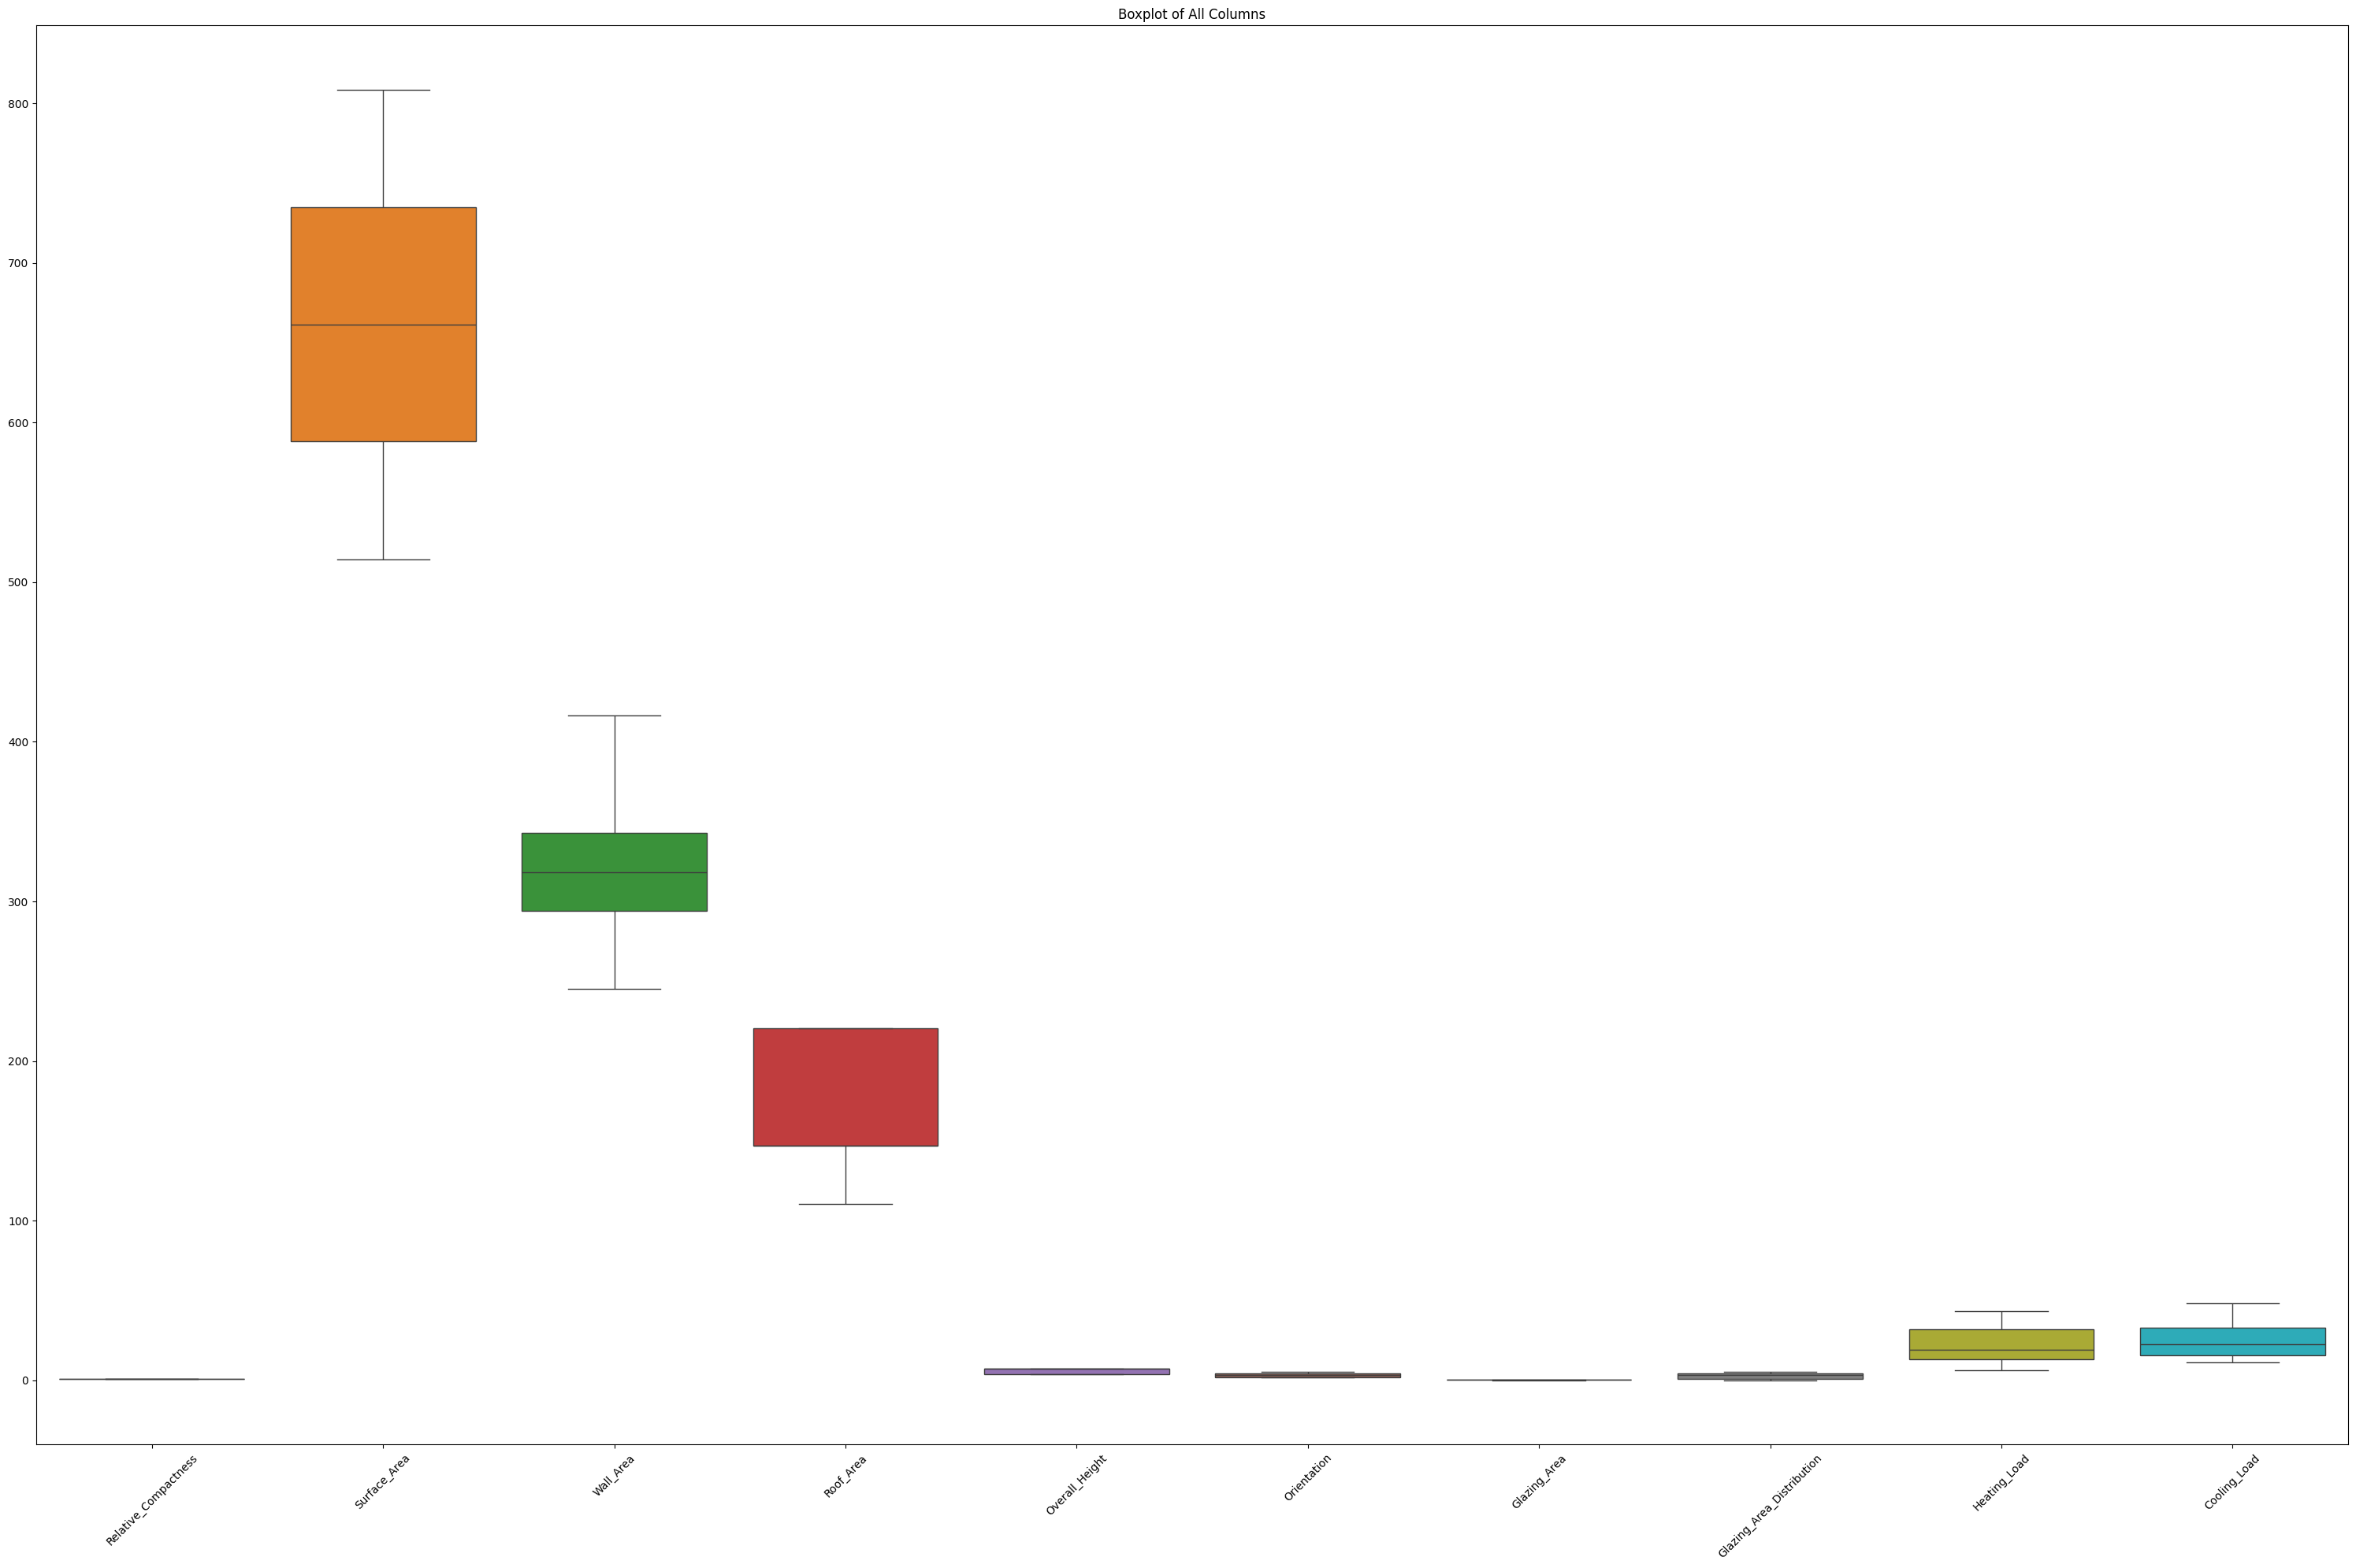

In [15]:
plt.figure(figsize=(30, 20)) 
sns.boxplot(data=df)

plt.xticks(rotation=45) 
plt.title("Boxplot of All Columns")

plt.tight_layout()
plt.show()

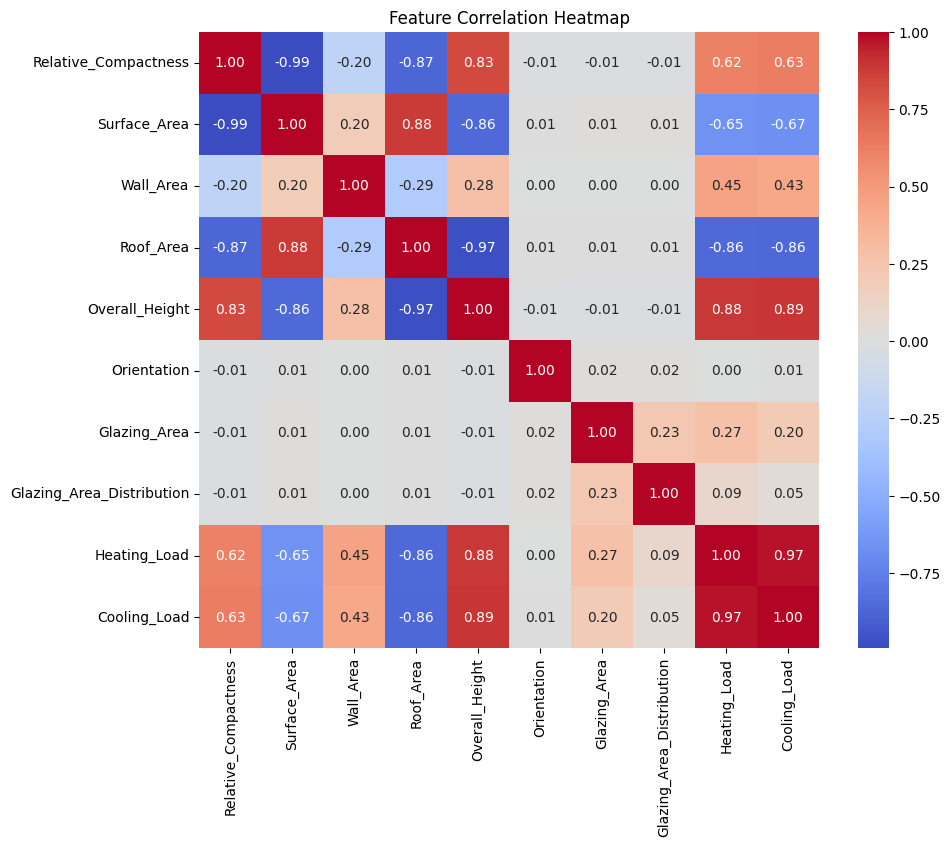

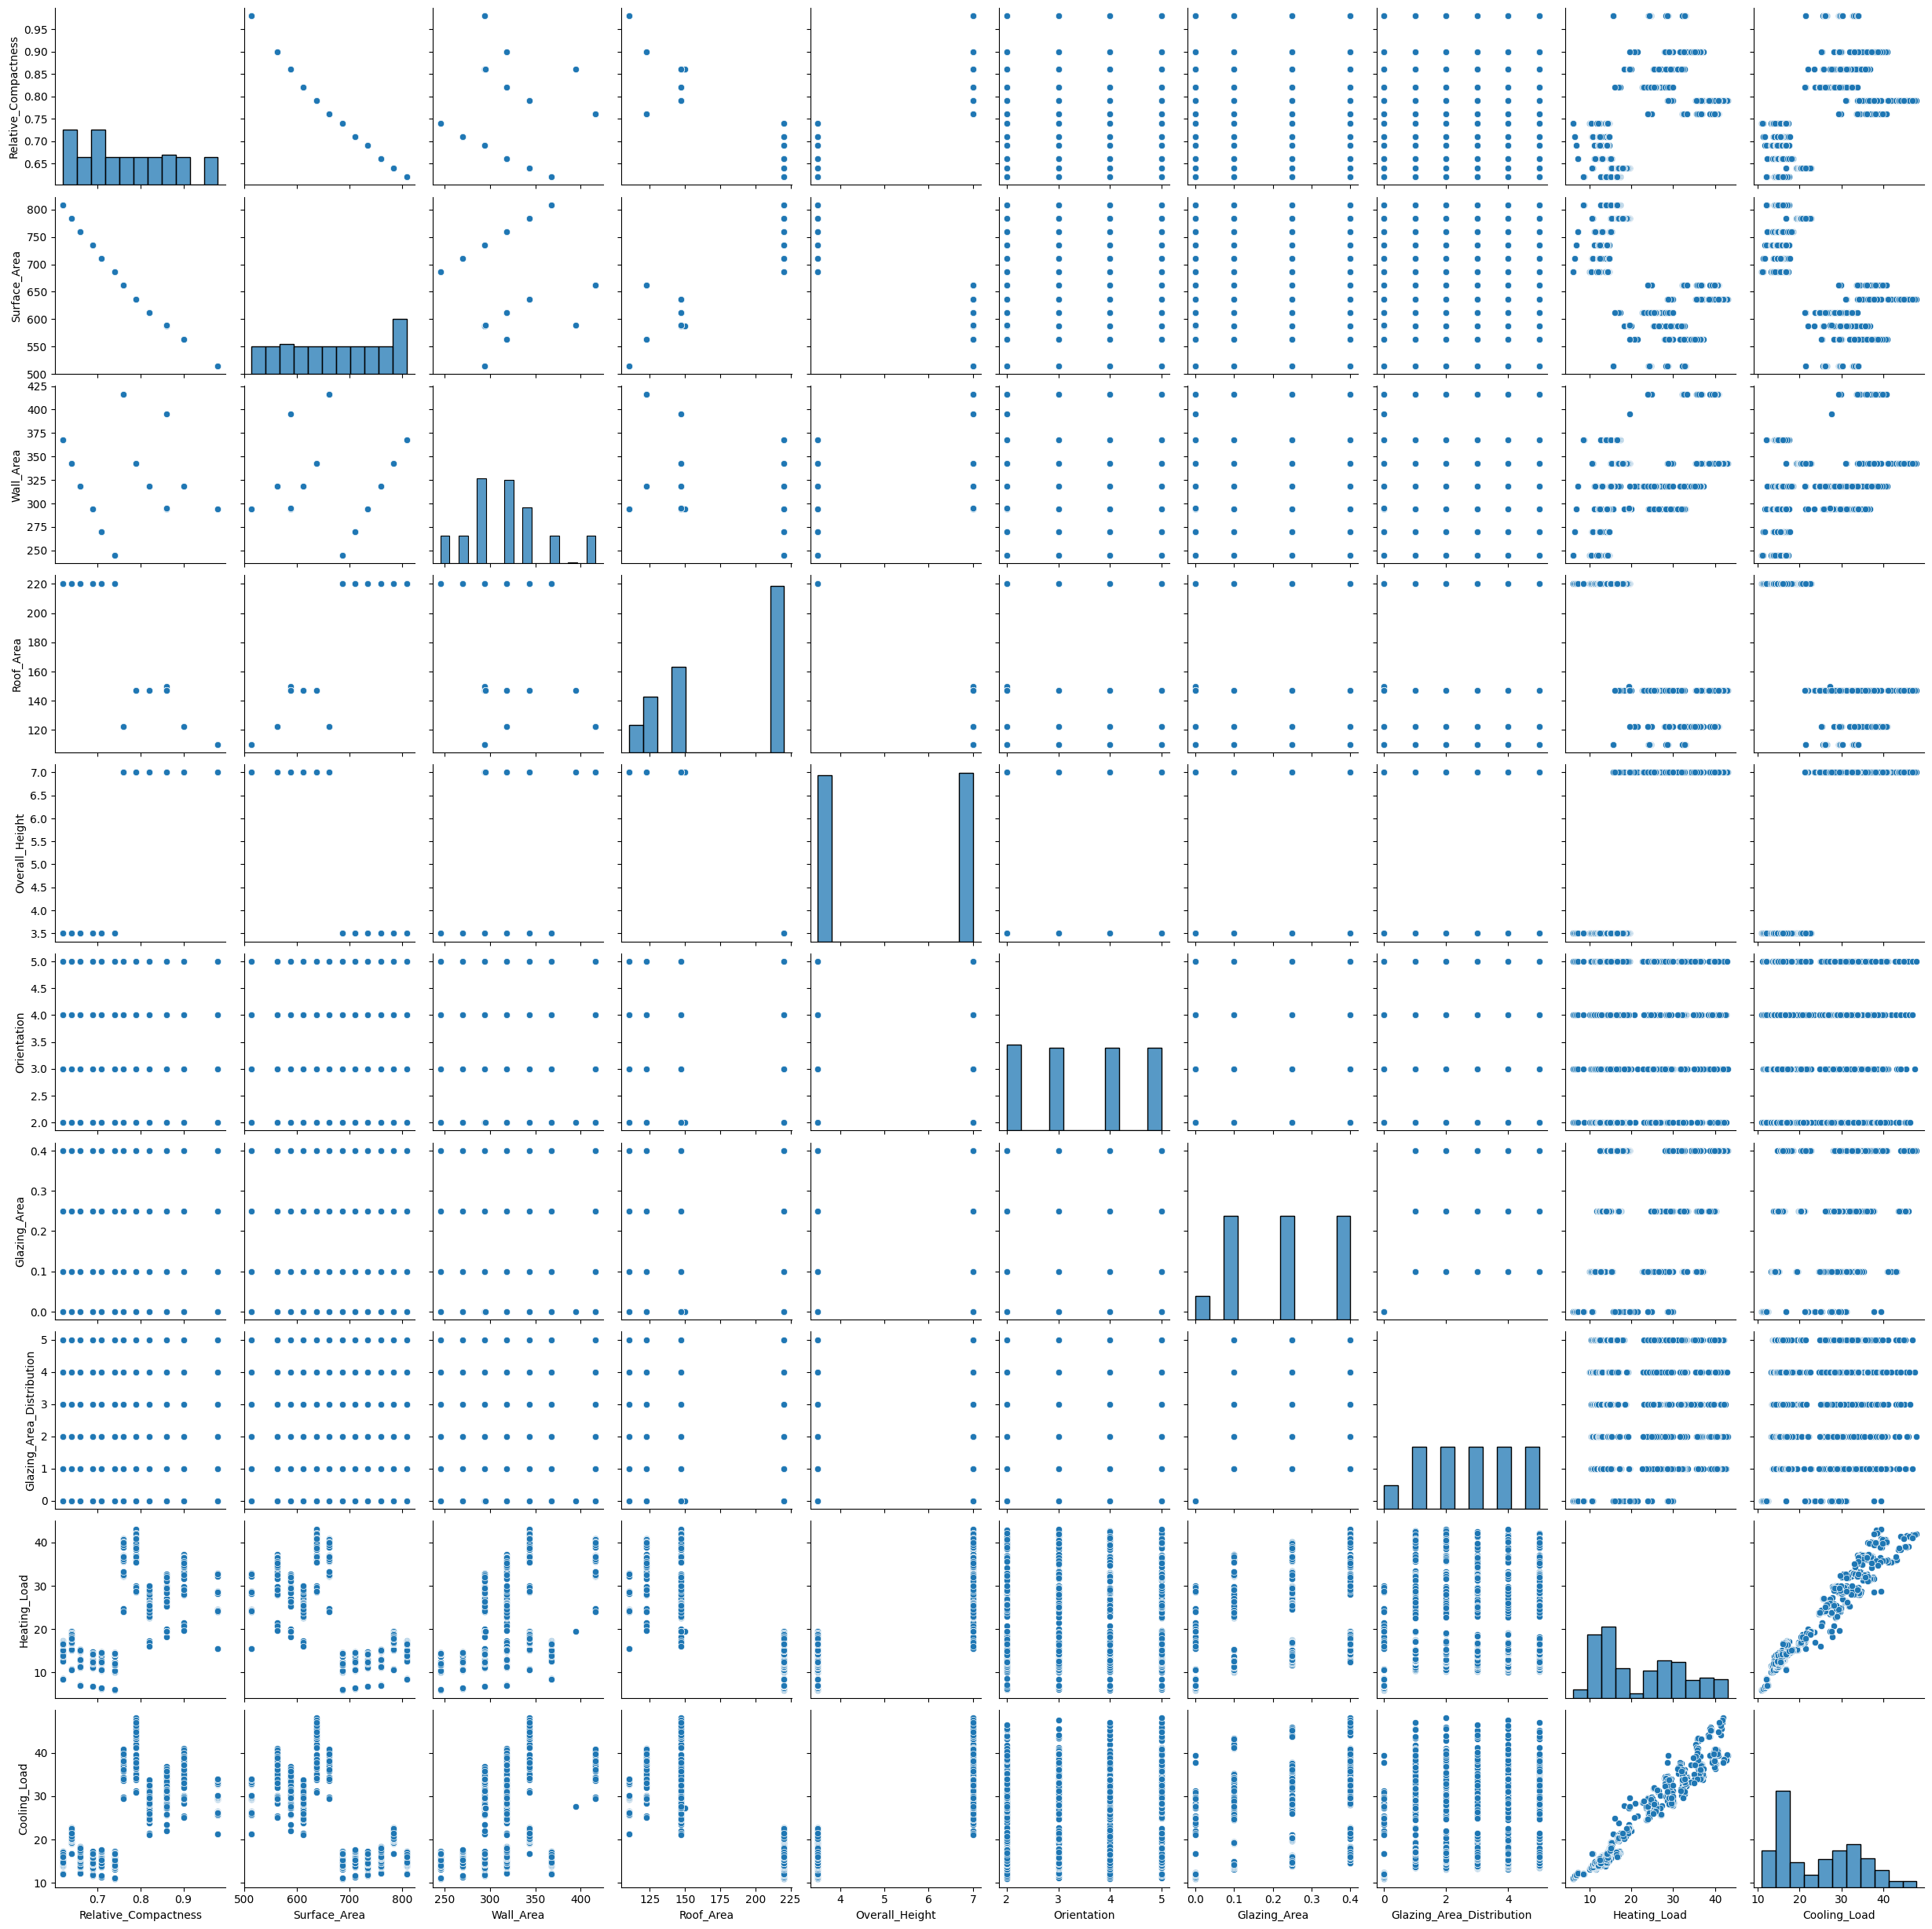

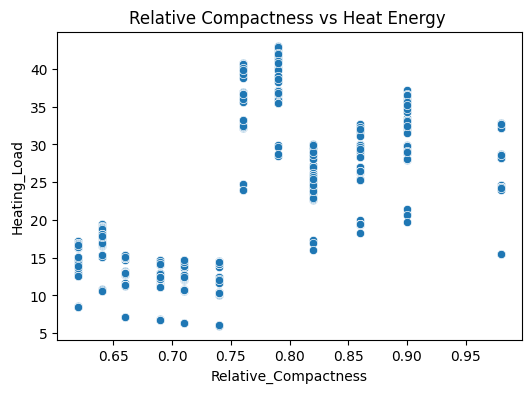

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

sns.pairplot(df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']])
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='Relative_Compactness', y='Heating_Load', data=df)
plt.title('Relative Compactness vs Heat Energy ')
plt.show()



In [17]:
df_heat=df_cool=df
df_heat=df_heat.drop("Cooling_Load",axis=1)
df_cool=df_cool.drop("Heating_Load",axis=1)

In [18]:
X=df_heat.drop("Heating_Load",axis=1)
y=df_heat["Heating_Load"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = model.score(X_test, y_test)

print(f"Mean Squared Error : {mse}")
print(f"R^2 Score : {r2}")
print(f"Model Score : {model_score}")

Mean Squared Error : 8.182256040035435
R^2 Score : 0.923214515526509
Model Score : 0.923214515526509


In [20]:
X=df_cool.drop("Cooling_Load",axis=1)
y=df_cool["Cooling_Load"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = model.score(X_test, y_test)

print(f"Mean Squared Error : {mse}")
print(f"R^2 Score : {r2}")
print(f"Model Score : {model_score}")

Mean Squared Error : 8.838755238039829
R^2 Score : 0.9008685824378522
Model Score : 0.9008685824378522


In [21]:
df_heat=df_cool=df
df_heat=df_heat.drop("Cooling_Load",axis=1)
df_cool=df_cool.drop("Heating_Load",axis=1)

In [22]:
X=df_heat.drop("Heating_Load",axis=1)
y=df_heat["Heating_Load"]
X_train, X_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y1_train)

RandomForestRegressor(random_state=42)

In [24]:
y1_pred = rf_model.predict(X_test)

In [25]:
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
model_score = rf_model.score(X_test, y1_test)

print(f"Mean Squared Error : {mse}")
print(f"R^2 Score : {r2}")
print(f"Model Score : {model_score}")

Mean Squared Error : 0.21351723118968463
R^2 Score : 0.9980322757303078
Model Score : 0.9980322757303078


In [26]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
X=df_heat.drop("Heating_Load",axis=1)
y1=df_heat["Heating_Load"]
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
xgb_model.fit(X_train, y1_train)
y1_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y1_test, y1_pred_xgb)
r2_xgb = r2_score(y1_test, y1_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R^2 Score: {r2_xgb}")

XGBoost - Mean Squared Error: 0.17205940938914205
XGBoost - R^2 Score: 0.9984143412042321


In [27]:
with open("../saved_models/heat_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

In [28]:
X=df_cool.drop("Cooling_Load",axis=1)
y2=df_cool["Cooling_Load"]
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

In [29]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y2_train)

RandomForestRegressor(random_state=42)

In [30]:
y2_pred = rf_model.predict(X_test)

In [31]:
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)
model_score = rf_model.score(X_test, y2_test)

print(f"Mean Squared Error : {mse}")
print(f"R^2 Score : {r2}")
print(f"Model Score : {model_score}")

Mean Squared Error : 2.613528779549459
R^2 Score : 0.972034075113805
Model Score : 0.972034075113805


In [32]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
X=df_cool.drop("Cooling_Load",axis=1)
y2=df_cool["Cooling_Load"]
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
xgb_model.fit(X_train, y2_train)
y2_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y2_test, y2_pred_xgb)
r2_xgb = r2_score(y2_test, y2_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R^2 Score: {r2_xgb}")

XGBoost - Mean Squared Error: 1.2431865268007989
XGBoost - R^2 Score: 0.9866973490783468


In [33]:
with open("../saved_models/cool_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)